<a href="https://colab.research.google.com/github/mikeninerbravog/Deteccao_com_YOLOv8/blob/master/POC_Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importa a biblioteca 'locale' para gerenciar configurações regionais (localização, idioma, codificação, etc.)
# Isso foi necessário para suprimir um erro de 'locale' do colab
import locale

# Ajusta a codificação padrão para UTF-8, garantindo que não ocorram erros de caracteres especiais ao exibir textos.
locale.getpreferredencoding = lambda: "UTF-8"

In [12]:
# Instala ou atualiza a biblioteca 'ultralytics', que contém a implementação do modelo YOLO (You Only Look Once).
# O argumento '--upgrade' garante que a versão mais recente seja instalada.

!pip install ultralytics --upgrade

# Importa a classe 'YOLO' da biblioteca 'ultralytics' para realizar tarefas de detecção de objetos.
from ultralytics import YOLO

In [13]:
# Conectar o Colab ao Google Drive para acessar arquivos

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import yaml
# Definir a configuração do dataset
# Ajustar a ordem das classes conforme as labels (0=tank, 1=warship, 2=soldier)
data_config = {
    'path': '/content/drive/MyDrive/yolo_war_dataset',  # Caminho para os dados
    'train': 'images/train',                            # Imagens de treinamento
    'val': 'images/val',                                # Imagens de validação
    'names': ['tank', 'warship', 'soldier'],            # Classes (0=tank, 1=warship, 2=soldier)
    'nc': 3                                             # Número de classes
}

# Criar o arquivo data.yaml com as configurações
with open('/content/drive/MyDrive/yolo_war_dataset/data.yaml', 'w') as file:
    yaml.dump(data_config, file, default_flow_style=False)

print("Arquivo data.yaml atualizado com sucesso!")



Arquivo data.yaml atualizado com sucesso!


In [15]:
# Carregar o modelo pré-treinado (YOLOv8 nano - mais leve e rápido)

model = YOLO('yolov8n.pt')  # Use 'yolov8s.pt' ou 'yolov8m.pt' para modelos mais robustos

results = model.train(
    data='/content/drive/MyDrive/yolo_war_dataset/data.yaml',   # Configuração do dataset
    epochs=50,                                                  # Número de épocas (50 rodadas de treinamento)
    imgsz=640,                                                  # Tamanho das imagens (640x640 pixels)
    batch=16,                                                   # Tamanho do lote (16 imagens por vez)
    name='yolo_war_detection',                                  # Nome da pasta de resultados
    project='/content/drive/MyDrive/yolo_war_dataset/',         # Salvar no Drive
    device=0                                                    # Usar GPU (se disponível) para acelerar o treinamento
)

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolo_war_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/yolo_war_dataset/, name=yolo_war_detection5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

train: Scanning /content/drive/MyDrive/yolo_war_dataset/labels/train.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/yolo_war_dataset/labels/val.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo_war_dataset/yolo_war_detection5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_war_dataset/yolo_war_detection5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.12G      1.704       3.29      1.788         38        640: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         18         45    0.00593      0.738      0.102     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.02G      1.661      3.296       1.81         29        640: 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         18         45    0.00567      0.703      0.264      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.03G      1.249      2.974      1.498         48        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         18         45    0.00625      0.685      0.414      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.03G      1.212      2.703       1.57         45        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         18         45    0.00693      0.685      0.445      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.04G      1.158      2.261      1.388         54        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         18         45    0.00651      0.609      0.483      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.01G      1.217      2.056       1.41         48        640: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         18         45    0.00719       0.65      0.518      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.03G      1.138      1.737       1.39         60        640: 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         18         45          1      0.077      0.499      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.02G      1.055      1.608      1.355         44        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         18         45          1      0.103      0.615      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.02G      1.022      1.579      1.354         46        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         18         45          1      0.141       0.61      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.03G        1.1      1.537      1.396         44        640: 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all         18         45      0.898      0.217       0.64       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.02G     0.9624      1.384      1.325         39        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         18         45      0.961      0.371      0.611       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.02G      1.033      1.378      1.357         57        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         18         45      0.931      0.398      0.613      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.03G      1.006      1.348      1.353         45        640: 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         18         45      0.839      0.557      0.679      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.04G       1.04      1.316      1.375         37        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         18         45      0.821      0.489      0.728      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.04G      1.022      1.261      1.318         40        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         18         45      0.809      0.572       0.74      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.03G      1.003      1.257      1.327         38        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         18         45      0.934      0.567      0.742      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.04G     0.9851      1.243      1.318         33        640: 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         18         45      0.958       0.54      0.719      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.03G      1.079      1.202      1.362         50        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         18         45      0.987      0.562      0.775      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.03G     0.9456      1.156      1.301         29        640: 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         18         45      0.974      0.567      0.744      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.04G     0.9977      1.225       1.37         31        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         18         45      0.981      0.544      0.719      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.02G      1.015       1.15      1.305         49        640: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         18         45      0.986       0.52      0.751      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.04G     0.9519      1.171      1.291         46        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


                   all         18         45      0.946      0.543      0.818      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.03G       1.04      1.181       1.33         40        640: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


                   all         18         45      0.793      0.683      0.867      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.04G       1.04      1.213      1.337         36        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         18         45      0.693      0.762      0.877      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.03G      1.072      1.126      1.318         51        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18         45       0.64       0.77      0.878      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.06G     0.9813       1.08      1.217         46        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         18         45      0.606      0.768      0.817      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.03G     0.9172      1.102      1.274         30        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         18         45       0.63      0.771      0.798      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.04G     0.9908      1.088      1.268         53        640: 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         18         45      0.755      0.847      0.866      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.04G     0.9649       1.08      1.214         43        640: 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         18         45      0.819      0.836      0.876      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.03G     0.9157      1.077      1.252         35        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


                   all         18         45      0.889       0.86      0.921      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.03G     0.9049      1.081      1.247         48        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         18         45      0.895      0.861      0.924      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.04G     0.9586      1.075      1.236         57        640: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         18         45      0.821      0.877      0.907      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.04G     0.8164     0.9856      1.178         51        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


                   all         18         45      0.917      0.843       0.93       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.04G     0.8911       1.05      1.249         31        640: 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         18         45      0.875      0.888      0.922      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.01G     0.8212      1.032       1.23         25        640: 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         18         45      0.868      0.864      0.911      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.03G     0.8433     0.9582      1.188         44        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         18         45      0.881      0.891      0.912       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.04G     0.9129      1.036       1.22         44        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         18         45      0.942      0.911      0.922      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.02G     0.9227     0.9599      1.229         49        640: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


                   all         18         45      0.937      0.912      0.924      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.03G     0.7856     0.9517      1.173         45        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         18         45      0.962      0.912      0.932      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.03G     0.8097     0.9608      1.171         36        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         18         45      0.922      0.925      0.931      0.645


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.01G     0.8615      1.162      1.177         16        640: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         18         45      0.931       0.93      0.935      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.01G     0.7392      1.047      1.106         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         18         45      0.957       0.92      0.935      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         2G     0.7661      1.005      1.132         29        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


                   all         18         45      0.958        0.9      0.931      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.01G     0.7916      1.038      1.149         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         18         45      0.959      0.878      0.929      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.03G     0.7821      1.038      1.121         23        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         18         45       0.96      0.877      0.931      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.03G     0.7879       1.06      1.166         20        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         18         45      0.943      0.905      0.937       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         2G     0.7395     0.9961      1.082         20        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         18         45      0.964      0.892      0.937      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         2G     0.7669     0.9677      1.102         21        640: 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         18         45      0.941       0.92      0.938      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         2G     0.7416     0.9913      1.121         23        640: 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         18         45      0.971      0.895       0.94      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.01G     0.7204     0.9465      1.081         27        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all         18         45      0.975      0.898       0.94      0.661



50 epochs completed in 0.031 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_war_dataset/yolo_war_detection5/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/yolo_war_dataset/yolo_war_detection5/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/yolo_war_dataset/yolo_war_detection5/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


                   all         18         45      0.971      0.895       0.94      0.665
                  tank         11         12      0.975          1      0.995      0.592
               warship          7         14          1      0.894      0.995      0.859
               soldier         12         19      0.937      0.789       0.83      0.542
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_war_dataset/yolo_war_detection5


In [16]:
import glob

# Localizar as imagens da pasta probe
probe_images = glob.glob('/content/drive/MyDrive/yolo_war_dataset/probe/*.png')

# Carregar o modelo treinado (melhor resultado)
model = YOLO('/content/drive/MyDrive/yolo_war_dataset/yolo_war_detection2/weights/best.pt')

# Realizar a detecção em cada imagem
for img_path in probe_images:
    results = model.predict(img_path, save=True, conf=0.4)



image 1/1 /content/drive/MyDrive/yolo_war_dataset/probe/1739889174.png: 640x640 2 tanks, 7.4ms
Speed: 4.7ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/drive/MyDrive/yolo_war_dataset/probe/1739889198.png: 640x640 2 warships, 15.7ms
Speed: 4.9ms preprocess, 15.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/drive/MyDrive/yolo_war_dataset/probe/1739889288.png: 640x640 3 warships, 7.6ms
Speed: 3.5ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/drive/MyDrive/yolo_war_dataset/probe/1739889351.png: 640x640 2 tanks, 7.4ms
Speed: 3.3ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/drive/MyDrive/yolo_war_dataset/probe/1739889390.png:

In [17]:
import IPython.display as display
from PIL import Image

# Localizar as imagens com previsões salvas
result_images = glob.glob('runs/detect/predict/*.png')

# Exibir as imagens com detecções
for img_path in result_images:
    display.display(Image.open(img_path))


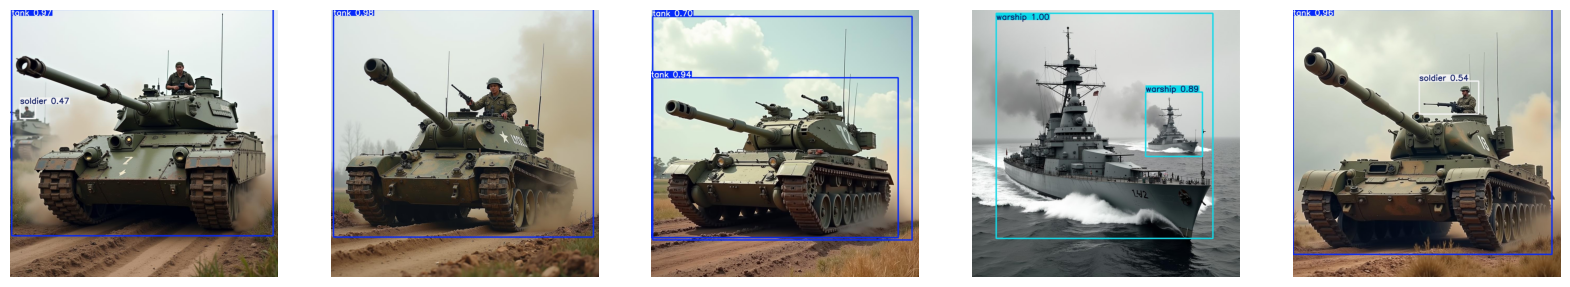

In [24]:
# Listando as imagens com as identificações

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Localizar as imagens com previsões salvas
result_images = glob.glob('/content/runs/detect/predict/*.jpg')

# Selecionar as 5 primeiras imagens
first_five_images = result_images[:5]

# Criar uma figura com subplots para exibir as imagens lado a lado
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Ajustar o tamanho da figura

# Iterar pelas imagens e exibi-las nos subplots
for i, img_path in enumerate(first_five_images):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Remover os eixos

plt.show()
